# STARTUP ALCHEMY: Turning Data into Success Spells


In [ ]:
!pip install plotly
!pip install pandasql
!pip install nbformat
!pip install flask
!pip install simplejson
!pip install werkzeug
!pip install flask_cors
!pip install sklearn.cross_validation
!pip install --upgrade nbformat

In [1]:
import pandas as pd
import plotly as py
import plotly.graph_objs as go
import pandasql as ps
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

py.offline.init_notebook_mode(connected=True)

In [2]:

df = pd.read_excel('Dataset.xlsx')

In [4]:
df2 = df[['Found','Employees','Number of Funding Rounds','valuation','Amount','Latest Funding Round Date','Number of Lead Investors','Number of Investors','Number of Acquisitions','Active Technologies','Labels'
           ]]
df2_corr_pd = df2.corr()
print(df2_corr_pd['Labels'].sort_values(ascending=False))

Labels                       1.000000
Active Technologies          0.164528
Latest Funding Round Date    0.162765
Employees                    0.076830
Number of Lead Investors     0.076139
Number of Investors          0.034801
Number of Acquisitions       0.007076
Found                       -0.014755
Number of Funding Rounds    -0.017458
valuation                   -0.067817
Amount                      -0.151861
Name: Labels, dtype: float64


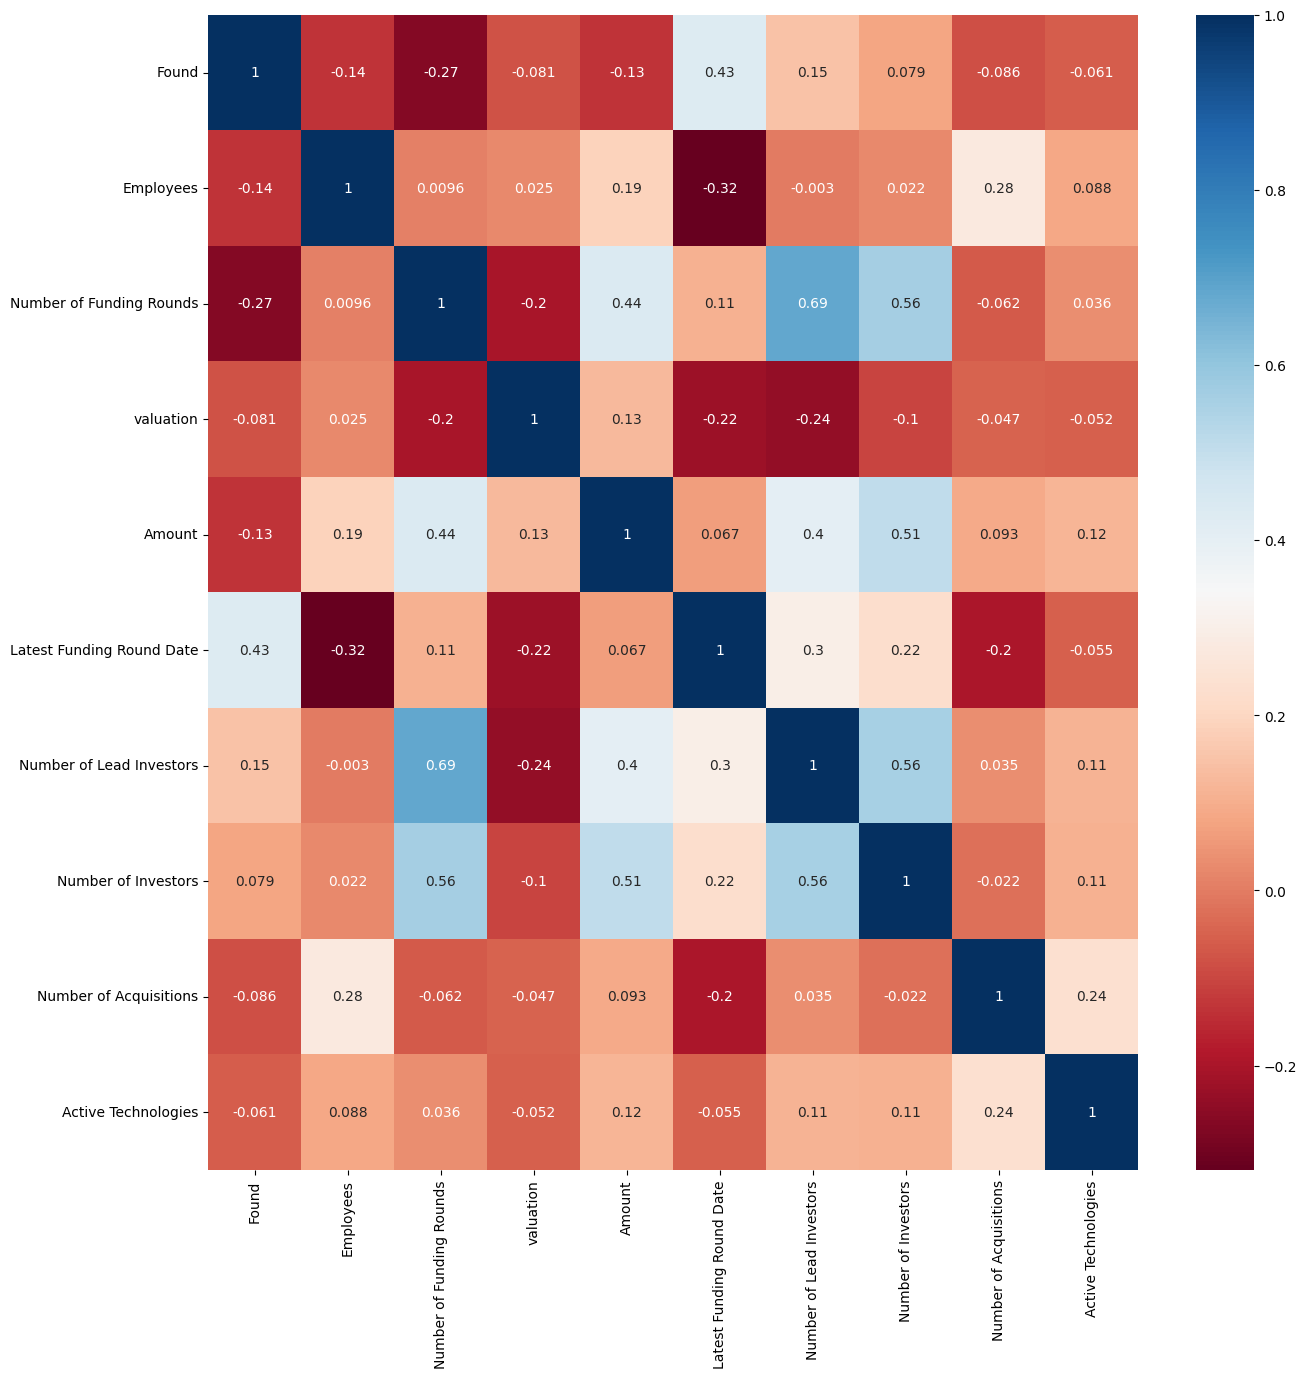

In [5]:
features = ['Found','Employees','Number of Funding Rounds','valuation','Amount','Latest Funding Round Date','Number of Lead Investors','Number of Investors','Number of Acquisitions','Active Technologies']

plt.figure(figsize = (15,15))
sn.heatmap(df[features].corr(), annot = True, cmap = plt.cm.RdBu)
plt.show()

In [6]:
q1 = ''' 
        select rounds_gp, 
               Success_Label, 
               count(*) as cnt 
        from (
        select Rounds,
               case when Rounds between 1 and 3 then "1-3" 
               when Rounds between 4 and 6 then "4-6"
               when Rounds between 7 and 10 then "7-10" 
               else "10+" end as rounds_gp,
               Success_Label
        from df
        ) dt1
        group by 1,2
        order by 1

'''

rel_df = ps.sqldf(q1, locals())
rel_df


,rounds_gp,Success_Label,cnt
0,1-3,Successful,10
1,1-3,Unsuccessful,6
2,10+,Successful,3
3,10+,Unsuccessful,2
4,4-6,Successful,14
5,4-6,Unsuccessful,6
6,7-10,Successful,21
7,7-10,Unsuccessful,9


In [7]:
label = np.concatenate([rel_df['rounds_gp'].unique(), rel_df['Success_Label'].unique()])
label

array(['1-3', '10+', '4-6', '7-10', 'Successful', 'Unsuccessful'],
      dtype=object)

In [8]:

for i in range(0,len(label[:4])):
    for j in range(4,len(label)):
        
        print(rel_df[(rel_df['rounds_gp']==label[i]) & (rel_df['Success_Label'] == label[j])]['cnt'].values[0])


10
6
3
2
14
6
21
9


In [9]:
label = np.concatenate([rel_df['rounds_gp'].unique(), rel_df['Success_Label'].unique()])
color = ["rgba(31, 119, 180, 0.8)", "rgba(255, 127, 14, 0.8)", "rgba(148, 103, 189, 0.8)", "rgba(140, 86, 75, 0.8)",
         "rgba(227, 119, 194, 0.8)", "rgba(44, 160, 44, 0.8)", "rgba(214, 39, 40, 0.8)"]

source = []
target = []
value = []

for i in range(0,len(label[:4])):
    for j in range(4, len(label)):
        source.append(i)
        if label[j] == 'Successful':
            target.append(4)
        else:
            target.append(5)
        value.append(rel_df[(rel_df['rounds_gp']==label[i]) & (rel_df['Success_Label'] == label[j])]['cnt'].values[0])

# print(source)
# print(target)
# print(value)

data = dict(
    type='sankey',
    node = dict(
      pad = 15,
      thickness = 20,
      label = label,
      color = color
    ),
    link = dict(
        source = source,
        target = target,
        value = value
  ))

layout =  dict(
    title = "Link between number of Number of Funding Rounds and company success/failure",
    font = dict(
      size = 10
    )
)
chmap = go.Figure(data = [data], layout = layout)
py.offline.iplot(chmap)


In [10]:
q2 = '''
        select Number_Investors, 
               Success_Label, 
               count(*) as cnt
        from (
        select Investors,
               case when Investors between 1 and 2 then "1-2" 
               when Investors between 3 and 5 then "3-5"
               else "5+" end as Number_Investors,
               Success_Label
        from df
        ) dt1
        group by 1,2
        order by 1
'''

investors_df = ps.sqldf(q2, locals())
investors_df

,Number_Investors,Success_Label,cnt
0,1-2,Successful,12
1,1-2,Unsuccessful,12
2,3-5,Successful,17
3,3-5,Unsuccessful,5
4,5+,Successful,19
5,5+,Unsuccessful,6


In [11]:
label = np.concatenate([investors_df['Number_Investors'].unique(), investors_df['Success_Label'].unique()])
label

array(['1-2', '3-5', '5+', 'Successful', 'Unsuccessful'], dtype=object)

In [12]:
label = np.concatenate([investors_df['Number_Investors'].unique(), investors_df['Success_Label'].unique()])
color = ["rgba(31, 119, 180, 0.8)", "rgba(255, 127, 14, 0.8)", "rgba(148, 103, 189, 0.8)", "rgba(140, 86, 75, 0.8)",
         "rgba(227, 119, 194, 0.8)", "rgba(44, 160, 44, 0.8)", "rgba(214, 39, 40, 0.8)"]

source = []
target = []
value = []

for i in range(len(label[:3])):
    for j in range(3, len(label)):
        source.append(i)
        if label[j] == 'Successful':
            target.append(3)
        else:
            target.append(4)
        value.append(investors_df[(investors_df['Number_Investors']==label[i]) & (investors_df['Success_Label'] == label[j])]['cnt'].values[0])

data = dict(
    type='sankey',
    node = dict(
      pad = 15,
      thickness = 20,
      label = label,
      color = color
    ),
    link = dict(
        source = source,
        target = target,
        value = value
  ))

layout =  dict(
    title = "Link between Number of Lead Investors and company success/failure",
    font = dict(
      size = 10
    )
)
chmap = go.Figure(data = [data], layout = layout)
py.offline.iplot(chmap)

In [13]:
q3 = '''
        select acquisitions_gp, 
               Success_Label, 
               count(*) as cnt
        from (
        select Acquisitions,
               case when Acquisitions = 0 then "0"
               when Acquisitions between 1 and 2 then "1-2" 
               when Acquisitions between 3 and 5 then "3-5"
               else "5+" end as acquisitions_gp,
               Success_Label
        from df
        ) dt1
        group by 1,2
        order by 1
'''

acquisitions_df = ps.sqldf(q3, locals())
acquisitions_df

,acquisitions_gp,Success_Label,cnt
0,0,Successful,26
1,0,Unsuccessful,13
2,1-2,Successful,17
3,1-2,Unsuccessful,6
4,3-5,Successful,3
5,3-5,Unsuccessful,2
6,5+,Successful,2
7,5+,Unsuccessful,2


In [14]:
label = np.concatenate([acquisitions_df['acquisitions_gp'].unique(), acquisitions_df['Success_Label'].unique()])
label

array(['0', '1-2', '3-5', '5+', 'Successful', 'Unsuccessful'],
      dtype=object)

In [15]:
label = np.concatenate([acquisitions_df['acquisitions_gp'].unique(), acquisitions_df['Success_Label'].unique()])
color = ["rgba(31, 119, 180, 0.8)", "rgba(255, 127, 14, 0.8)", "rgba(148, 103, 189, 0.8)", "rgba(140, 86, 75, 0.8)",
         "rgba(227, 119, 194, 0.8)", "rgba(44, 160, 44, 0.8)", "rgba(214, 39, 40, 0.8)"]

source = []
target = []
value = []

for i in range(len(label[:4])):
    for j in range(4, len(label)):
        source.append(i)
        if label[j] == 'Successful':
            target.append(4)
        else:
            target.append(5)
        value.append(acquisitions_df[(acquisitions_df['acquisitions_gp']==label[i]) & (acquisitions_df['Success_Label'] == label[j])]['cnt'].values[0])

data = dict(
    type='sankey',
    node = dict(
      pad = 15,
      thickness = 20,
      label = label,
      color = color
    ),
    link = dict(
        source = source,
        target = target,
        value = value
  ))

layout =  dict(
    title = "Link between Number of Acquisitions and company success/failure",
    font = dict(
      size = 10
    )
)
chmap = go.Figure(data = [data], layout = layout)
py.offline.iplot(chmap)

In [16]:
df.to_csv("data\output.csv", encoding="utf-8")

In [17]:
valuation = df['valuation'].values
funding_total = df['Amount'].values

In [18]:
trace = go.Scatter(x = funding_total,
                   y = valuation,
                   mode = "markers",
                   marker = dict(size = 12, color = "rgba(0, 0, 255, 0.9)"))
data = [trace]

layout = {"title": "Correlation between total funding and price acquired",
          "xaxis": {"title": "Total funding", "zeroline": False},
          "yaxis": {"title": "Price acquired", "zeroline": False},}

py.offline.iplot({"data": data, "layout": layout})